# IMPORTS

In [7]:
# Data and Datasets
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold


# Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Classifiers
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# Hyper-parameter optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Feature selection & feature engineering
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# Stats
from scipy.stats import randint as sp_randint
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro     # Shapiro Wilk
from scipy.stats import normaltest  # D’Agostino’s K^2
from scipy.stats import anderson    # Anderson-Darling
from scipy.stats import ttest_ind    # independent student t-test; assumes normality
from scipy.stats import mannwhitneyu # non-parametric; doesn't assume normality

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG


# Utils
import pprint
import numpy as np
from time import time

In [12]:
# Loading the dataset from sklearn (free dataset)
dataset = load_wine()

# Convert to Pandas DataFrame - 
df = pd.DataFrame(data=np.c_[dataset['data'], dataset['target']],
                     columns=dataset['feature_names'] + ['target'])


# Converting class labels to int
df['target'] = df['target'].astype('int')

# Storing references to feature names and (unique) class labels
feature_names = dataset['feature_names']
class_labels = df['target'].unique().astype('str')

# Get the X (feature matrix) and y (class label vector) from the data
X_wine, y_wine = dataset.data, dataset.target

print("Shape of feature matrix:", X_wine.shape)

# And just to ensure we've loaded what we expect..
dataset_df.head()

Shape of feature matrix: (178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [13]:
# The code in cell 2 gathers the data from the dataset and converts it into a dataset

#If you wanted to use a standard CSV for example an Excel file, use the code below.
# df = pd.read_csv('data.csv')  
# from here you are able to perform calculations on the dataset using python libraries.

In [26]:
df.shape # this shows (instances, rows)

(178, 14)

In [16]:
df.describe()
# this gives us the descriptive statistics about the dataset.

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


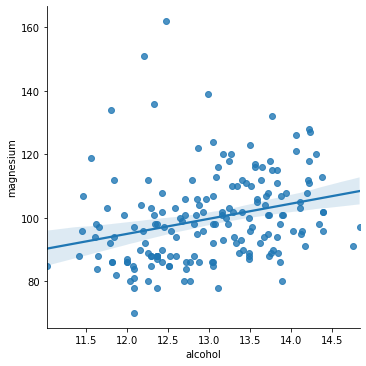

In [20]:
# to create a simple scatter graph you can either use Seaborn or matplot lib, i will show you both ways.
sns.lmplot(data=df, x="alcohol", y="magnesium")

<AxesSubplot:title={'center':'title..'}, xlabel='alcohol', ylabel='magnesium'>

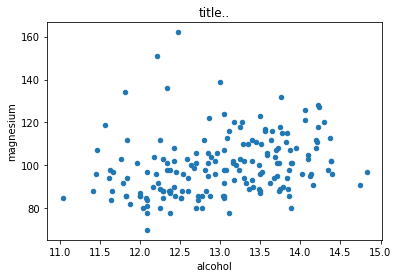

In [21]:
df.plot(kind='scatter', x = "alcohol", y="magnesium", title='title..')
# this is the standard way to plot dataframes.

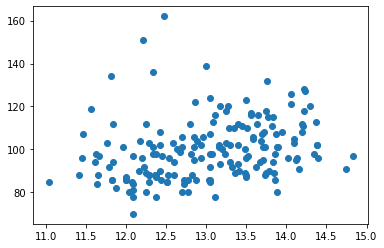

In [24]:
plt.scatter(df["alcohol"],df["magnesium"])
#this is the matplot lib way of plotting,
# there are many different types of graphs you can use such as bar, barh, pie, boxplots etc.

Spearmans correlation coefficient: 0.366


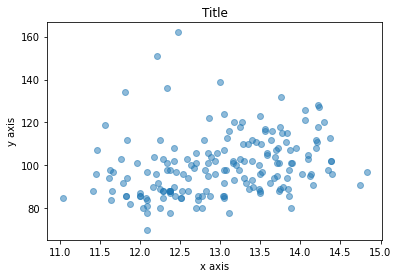

In [30]:
from scipy.stats import spearmanr # spearmans rank coefficient

a = np.array(df["alcohol"])
b = np.array(df["magnesium"])
plt.title("Title")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.scatter(a,b, alpha=0.5) # alpha is the opacity, if you wanted to see clusters better
coef, p = spearmanr(a, b)
print('Spearmans correlation coefficient: %.3f' % coef) #prints coefficient to 3 decimal points

In [31]:
# if for example you had missing data in your dataset you can check how many by using this code.
print(df.isnull().sum())
# we see theres no missing data.

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


Text(0.5, 1.0, "Spearman's rank correlation")

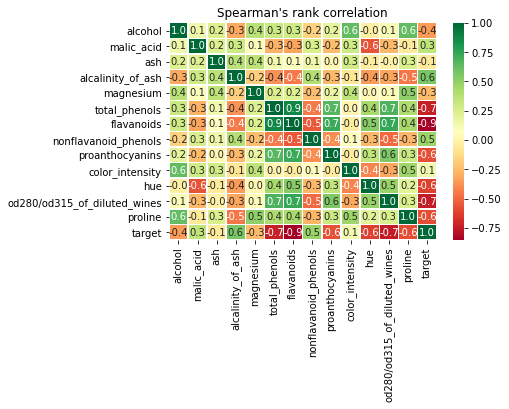

In [32]:
# this shows the Spearmans rank coefficient correlation between each feature.
# this can be good for determining which features are useless or most useful.
corr = df.corr(method='spearman')
ax = sns.heatmap(data=corr, annot=True, linewidths=.5, fmt= '.1f', cmap='RdYlGn')
ax.set_title("Spearman's rank correlation")

<AxesSubplot:>

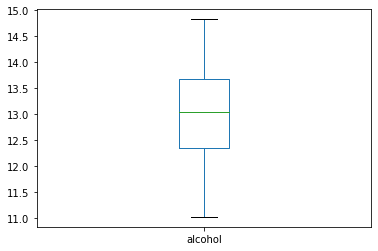

In [34]:
df['alcohol'].plot(kind='box')
# this is how you could plot a box plot.
# if you wanted multiple box plots in one graph you could do this below


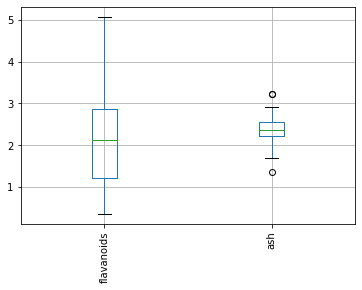

In [37]:
boxplot = df.boxplot(column=["flavanoids","ash"],rot=90)

In [38]:
df.info() # this will further tell you more details about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [40]:
sum(df.apply(lambda x: sum(x.isnull().values), axis = 1)==1)
# above is code that will sum up how many rows have 1 missing instance "==1" can be changed.

0

In [54]:
df.groupby("target")["alcohol"].count() # this shows the amount of values in each target for alcohol.

target
0    59
1    71
2    48
Name: alcohol, dtype: int64

In [55]:
df.groupby("target")["alcohol"].mean() # this grabs the mean for each target for value alcohol.

target
0    13.744746
1    12.278732
2    13.153750
Name: alcohol, dtype: float64

In [57]:
df.duplicated().sum() # this shows how many duplicated values are in the dataset

0

In [58]:
duplicate = df[df.duplicated()] # this creates a datafram duplicate of any duplicate values in the dataset.
duplicate

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target


<AxesSubplot:xlabel='Target', ylabel='Frequency'>

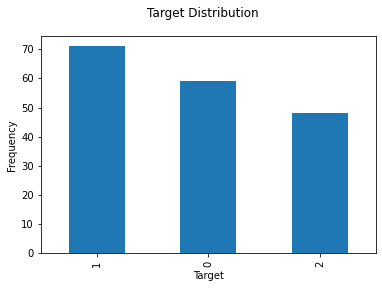

In [59]:
plt.figure()
plt.suptitle('Target Distribution')
plt.ylabel('Frequency')
plt.xlabel('Target')
df['target'].value_counts().plot(kind="bar")
# this shows how many values are in each "target"/"class"

# Classification

In [74]:
# First X and y has to be defined.
X, y = df.drop(["target"],axis=1), df["target"]
# X is the dataset without target feature
# y is the "true values" or targets if you like.

# Splitting dataset classification
X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                    y, # label vector
                                                    test_size=0.3, # 30% test / 70% traing
                                                    random_state=1, # fixed random seed
                                                    stratify=df["target"]# split dataset proportional to targets/classes
                                                   )


In [78]:
# Instantiating model
model = RandomForestClassifier()

# Training model - this is where the classifier picks up on hints in the data
model = model.fit(X_train, y_train)

# Testing model
y_pred = model.predict(X_test)
#y_pred is the predictive target values. Random forest predicts these values based on the training data.

In [84]:
from sklearn.metrics import confusion_matrix
# There are many ways to visualise classification performance, One way is through confusion matrixis
confusion_matrix(y_test, y_pred)

# true positives are 
#[T,F,F]
#[F,T,F]
#[F,F,T]

array([[18,  0,  0],
       [ 0, 21,  0],
       [ 0,  0, 15]], dtype=int64)

In [85]:
accuracy_score(y_test, y_pred) # this shows accuracy, can also use recall or precision instead of accuracy
# or use them all together.

1.0

In [87]:
from sklearn.metrics import classification_report
# the easiest way to gauge performance is to use classification report
print(classification_report(y_test, y_pred)) # this shows precision, recall and f1 score for each "target"
# it also shows overall accuracy and how many values were used in the test data under "support"

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [143]:
# we will now compare 2 classifiers to each other on the same data

# first we need a way of adding the data into a new dataframe (so we can visualise it later on)
df2 = pd.DataFrame()

def add():

   

In [146]:
# Instantiating model
model = RandomForestClassifier()

# Training model - this is where the classifier picks up on hints in the data
model = model.fit(X_train, y_train)

# Testing model
y_pred = model.predict(X_test)
#y_pred is the predictive target values. Random forest predicts these values based on the training data.
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
#add("Random Forest", accuracy)


1.0


In [147]:
df2

""
